### Imports

In [1]:
# loading basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random
import csv
import cv2
import shutil
from pathlib import Path

### Code formatting in Jupyter cells

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### Constants

In [3]:
path_to_all_images = os.path.join(os.path.pardir, "images/")

path_to_train_folder = os.path.join(os.path.pardir, "data", "train_images")
path_to_test_folder = os.path.join(os.path.pardir, "data", "test_images")
path_to_validation_folder = os.path.join(os.path.pardir, "data", "valid_images")

<IPython.core.display.Javascript object>

In [4]:
class_name = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo",
}

<IPython.core.display.Javascript object>

## Train set

In [5]:
# converting .txt file to .csv file
def convertTxtToCsv(txtfile):
    df = pd.read_csv(txtfile, sep=" ")
    df.to_csv(csvfile)

<IPython.core.display.Javascript object>

In [6]:
txtfile = os.path.join(os.path.pardir, "labels", "train.txt")
csvfile = os.path.join(os.path.pardir, "csv_files", "train.csv")
convertTxtToCsv(txtfile)

<IPython.core.display.Javascript object>

In [9]:
# Loading data
def loadData(csvfile):
    return pd.read_csv(csvfile, header=None, usecols=[1, 2], names=["image", "class"])


df = loadData(csvfile)
df.head()

,image,class
0,imagesq/q/o/c/qoc54c00/80035521.tif,15
1,imagese/e/w/c/ewc23d00/513280028.tif,1
2,imagesw/w/b/t/wbt26e00/2053453161.tif,7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif,10
4,imageso/o/e/x/oex80d00/522787731+-7732.tif,3


<IPython.core.display.Javascript object>

In [11]:
# take 200 images from each class for training
def sampleImages(df, sampleNo):
    return (
        df.groupby("class").apply(lambda x: x.sample(sampleNo)).reset_index(drop=True)
    )


df = sampleImages(df, 200)
df.to_csv(csvfile)

<IPython.core.display.Javascript object>

In [12]:
# df has only 3200 rows now (200 for each class)
df

,image,class
0,imagesa/a/i/a/aia54f00/0060317226.tif,0
1,imagesl/l/l/a/lla69c00/50142990-2990.tif,0
2,imagest/t/e/g/teg05d00/506022701.tif,0
3,imagesd/d/s/t/dst84e00/1000303340_1000303341.tif,0
4,imagesh/h/n/z/hnz89c00/40005942-5942.tif,0
...,...,...
3195,imagesc/c/o/c/coc84f00/0060363357.tif,15
3196,imagesy/y/h/n/yhn31f00/0001442636.tif,15
3197,imagesk/k/o/y/koy57c00/2073414935.tif,15
3198,imagesc/c/j/t/cjt15f00/0060193298.tif,15


<IPython.core.display.Javascript object>

In [13]:
def changeDatatypes(df):
    df["image"] = df["image"].astype(str)
    df["class"] = df["class"].astype(int)


changeDatatypes(df)

<IPython.core.display.Javascript object>

In [14]:
for i in range(len(df["image"])):
    my_file = Path(path_to_all_images + df["image"][i])
    print(my_file)

..\images\imagesa\a\i\a\aia54f00\0060317226.tif
..\images\imagesl\l\l\a\lla69c00\50142990-2990.tif
..\images\imagest\t\e\g\teg05d00\506022701.tif
..\images\imagesd\d\s\t\dst84e00\1000303340_1000303341.tif
..\images\imagesh\h\n\z\hnz89c00\40005942-5942.tif
..\images\imageso\o\s\w\osw87c00\512918074+-8074.tif
..\images\imagesk\k\r\i\kri72d00\518641913_518641917.tif
..\images\imagesz\z\g\l\zgl70e00\89697020.tif
..\images\imagesi\i\h\x\ihx53d00\510691194_510691195.tif
..\images\imagesb\b\k\u\bku06c00\2048834936_4937.tif
..\images\imagesp\p\o\l\pol85d00\503712450_503712451.tif
..\images\imagest\t\x\z\txz79d00\500319666.tif
..\images\imagesz\z\w\g\zwg85d00\503749269.tif
..\images\imagesu\u\a\i\uai94d00\505885669_505885712.tif
..\images\imagese\e\n\p\enp48d00\2063240003_0004.tif
..\images\imagesk\k\g\i\kgi23a00\501469558+-9559.tif
..\images\imagesu\u\e\z\uez71e00\01129452.tif
..\images\imageso\o\p\c\opc43d00\512176697.tif
..\images\imagesv\v\o\f\vof69e00\2028991082.tif
..\images\imagesp\p\w\h

..\images\imagesy\y\f\t\yft71f00\2023023000.tif
..\images\imagesg\g\p\i\gpi29d00\502046034.tif
..\images\imagesv\v\t\v\vtv10d00\502608501+-8501.tif
..\images\imagesg\g\l\q\glq26c00\2071466782_6783.tif
..\images\imagesv\v\g\c\vgc18c00\2081191537.tif
..\images\imagesd\d\y\e\dye71d00\502590571+-0571.tif
..\images\imagesb\b\n\g\bng19d00\502359692.tif
..\images\imagesc\c\g\t\cgt64c00\98978544_8545.tif
..\images\imagesl\l\e\f\lef11c00\71189336.tif
..\images\imagesl\l\u\v\luv74e00\1002760176.tif
..\images\imagesx\x\e\b\xeb95a00\500383952+-3952.tif
..\images\imagesj\j\o\n\jon10d00\502590759+-0759.tif
..\images\imagesb\b\z\j\bzj12d00\71206423.tif
..\images\imagesx\x\t\m\xtm02a00\1003071261.tif
..\images\imagesy\y\j\z\yjz99d00\04414395_04414398.tif
..\images\imagesl\l\s\w\lsw51c00\501461455+-1455.tif
..\images\imagesw\w\y\p\wyp90d00\518308128+-8130.tif
..\images\imagesm\m\c\x\mcx74e00\2023237498.tif
..\images\imagesr\r\g\r\rgr81f00\2044943679.tif
..\images\imagesr\r\g\p\rgp70d00\522484486+-4487.

..\images\imagesj\j\m\d\jmd42f00\11003942.tif
..\images\imagesf\f\a\a\faa04c00\2063935629.tif
..\images\imagesd\d\x\z\dxz07d00\tnwl0007645.tif
..\images\imagesw\w\p\e\wpe22f00\09005455.tif
..\images\imagesj\j\j\q\jjq05e00\2040801470.tif
..\images\imagesz\z\h\v\zhv44c00\96652840_2842.tif
..\images\imagesn\n\d\m\ndm60e00\93450025.tif
..\images\imagesq\q\b\e\qbe84c00\92296056_6057.tif
..\images\imagesr\r\q\s\rqs93e00\2040792933.tif
..\images\imagesa\a\x\g\axg44c00\86650903_0904.tif
..\images\imagesa\a\h\h\ahh62e00\2060317522.tif
..\images\imagesn\n\r\e\nre22f00\09005498.tif
..\images\imagesd\d\j\j\djj16c00\2071267421.tif
..\images\imagesq\q\j\b\qjb03f00\tob02415.02.tif
..\images\imagesv\v\n\m\vnm86d00\ti16240485.tif
..\images\imagesz\z\x\r\zxr54c00\98210488.tif
..\images\imagesf\f\k\v\fkv44c00\96652658_2659.tif
..\images\imagesl\l\a\n\lan10e00\04239182.tif
..\images\imagesm\m\w\f\mwf81a00\2058164163.tif
..\images\imagesg\g\h\d\ghd04e00\2040649091.tif
..\images\imagesu\u\e\f\uef22f00\09005

<IPython.core.display.Javascript object>

In [15]:
# new directory where the 3200 images will be stored by category
os.chdir(path_to_train_folder)

# create a subfolder for each category and copy each image to the correspondent subfolder
def groupDocsByCtegory(df, path_to_folder):

    for i in range(16):
        os.mkdir(str(i))
    os.chdir(os.path.pardir)

    for i in range(len(df)):
        for j in range(16):
            if df["class"][i] == j:
                shutil.copy2(
                    path_to_all_images + "/" + df["image"][i],
                    path_to_folder + "/" + str(j) + "/",
                )
            else:
                continue


groupDocsByCtegory(df, path_to_train_folder)

<IPython.core.display.Javascript object>

In [24]:
# rename each folder using the class name
def renameFolders(df, path_to_folder):
    for j in class_name.keys():
        os.rename(
            path_to_folder + "/" + str(j), path_to_folder + "/" + class_name[j],
        )


renameFolders(df, path_to_train_folder)

<IPython.core.display.Javascript object>

In [25]:
# ensure that we will get same random output
random.seed(22)

# take a random photo from each class
def random_photo_per_class(path):
    random_images = []
    for root, dirs, files in os.walk(path):
        image = random.choice(os.listdir("{}".format(root)))
        random_images.append(str(root) + os.sep + str(image))
    return random_images


examples = random_photo_per_class(path_to_train_folder)[1:]

<IPython.core.display.Javascript object>

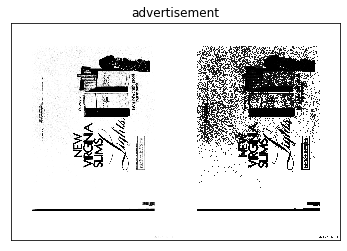

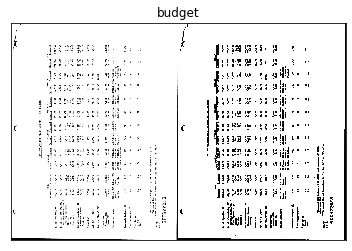

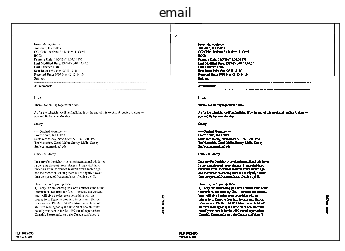

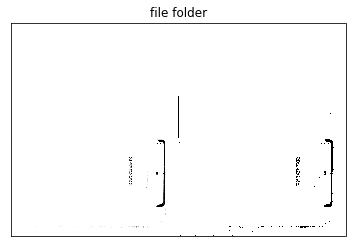

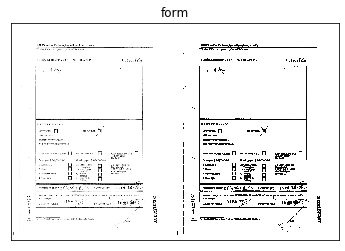

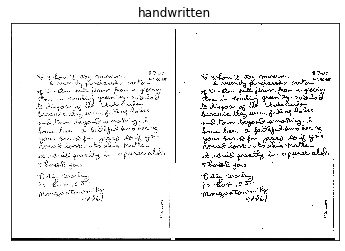

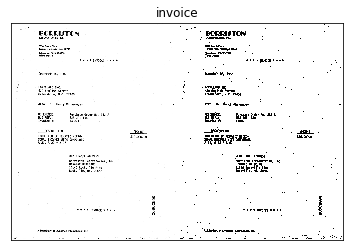

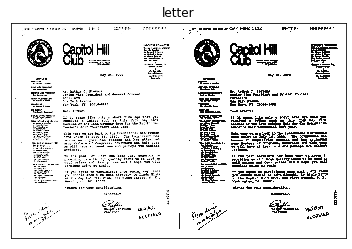

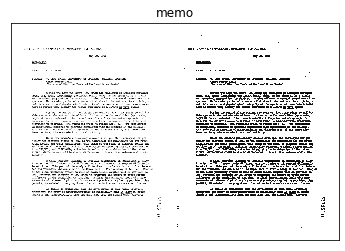

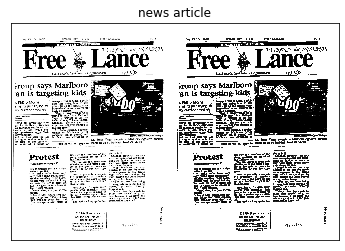

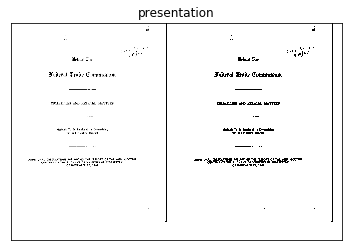

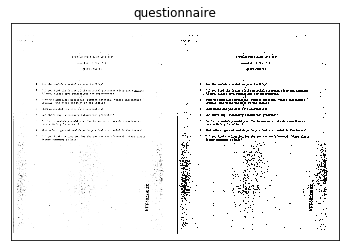

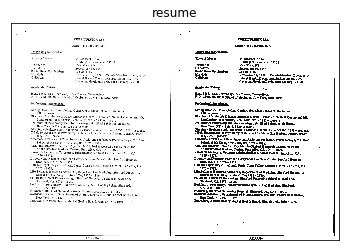

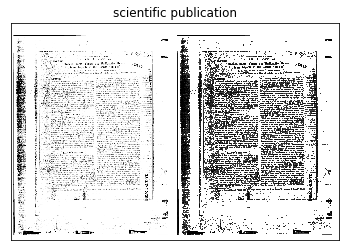

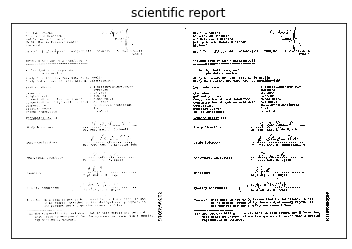

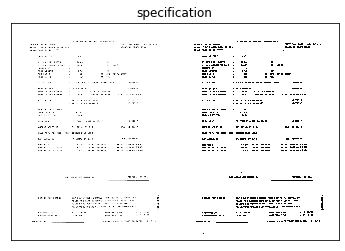

<IPython.core.display.Javascript object>

In [26]:
# print a random photo from each class
def printPhotosFromEachClass(examples):
    for image in examples:
        directory = os.path.dirname(image)
        doctype = directory.rsplit("\\", 1)[-1]
        img = cv2.imread(image, 0)

        equ = cv2.equalizeHist(img)
        res = np.hstack((img, equ))

        plt.subplot(111)
        plt.imshow(res, cmap="Greys_r")
        plt.title("{}".format(doctype))
        plt.xticks([])
        plt.yticks([])

        plt.show()


printPhotosFromEachClass(examples)

## Test set

In [27]:
# converting .txt file to .csv file
txtfile = os.path.join(os.path.pardir, "labels", "test.txt")
csvfile = os.path.join(os.path.pardir, "csv_files", "test.csv")

convertTxtToCsv(txtfile)

<IPython.core.display.Javascript object>

In [28]:
# Loading data
df = loadData(csvfile)
df.head()

,image,class
0,imagesr/r/g/e/rge31d00/503210033+-0034.tif,3
1,imagesc/c/e/j/cej80d00/517306722+-6724.tif,3
2,imagesm/m/r/r/mrr36d00/50603620-3621.tif,14
3,imagesg/g/t/u/gtu29c00/2084573574a.tif,2
4,imagesh/h/o/f/hof08d00/2071783492.tif,9


<IPython.core.display.Javascript object>

In [30]:
# take 100 images from each class for testing
df = sampleImages(df, 100)
changeDatatypes(df)
df

,image,class
0,imagesa/a/r/r/arr18c00/505155159+-5160.tif,0
1,imagesm/m/q/p/mqp83d00/508935322.tif,0
2,imagesu/u/u/f/uuf69d00/500815144.tif,0
3,imagesx/x/c/k/xck07c00/CTRSP-FILES007428-74.tif,0
4,imagesi/i/n/l/inl10e00/85006805.tif,0
...,...,...
1595,imagesm/m/k/w/mkw21c00/2085569304.tif,15
1596,imagesi/i/i/r/iir58e00/2022184955_2022184960.tif,15
1597,imagesn/n/f/c/nfc2aa00/10056109.tif,15
1598,imagest/t/x/p/txp20a00/10182843.tif,15


<IPython.core.display.Javascript object>

In [32]:
# new directory where the 1600 images will be stored by category
os.chdir(path_to_test_folder)
groupDocsByCtegory(df, path_to_test_folder)

<IPython.core.display.Javascript object>

In [33]:
# rename each folder using the class name
renameFolders(df, path_to_test_folder)

<IPython.core.display.Javascript object>

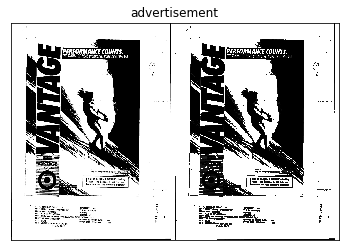

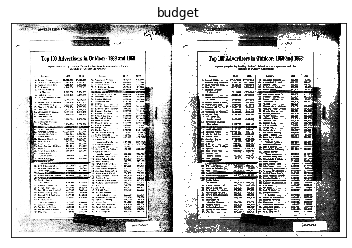

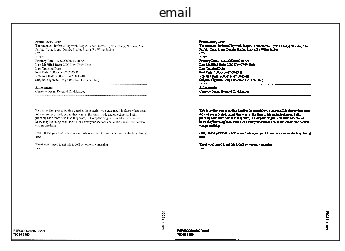

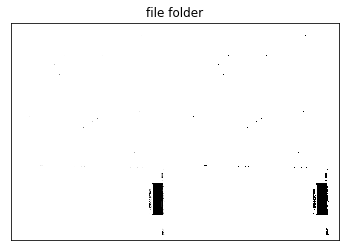

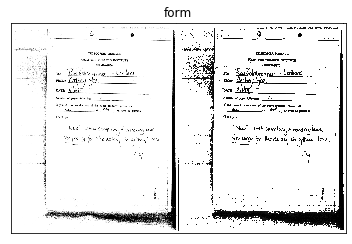

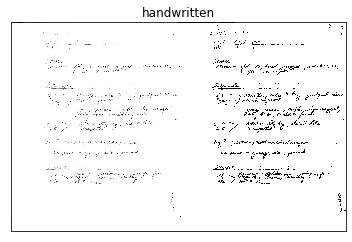

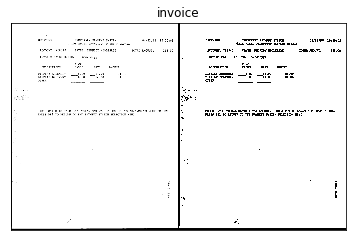

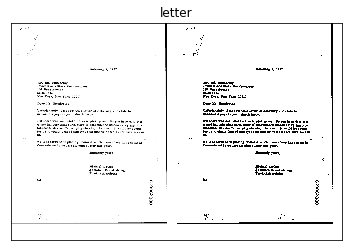

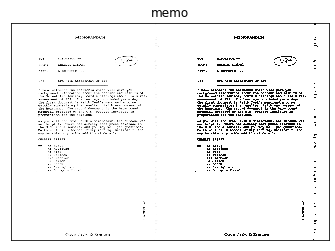

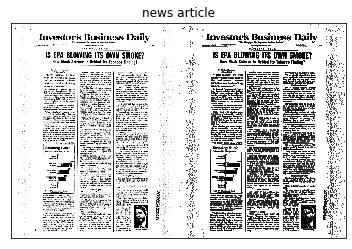

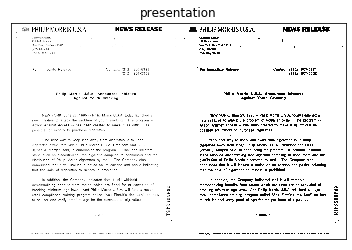

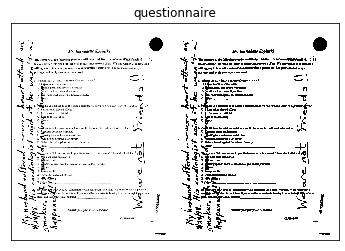

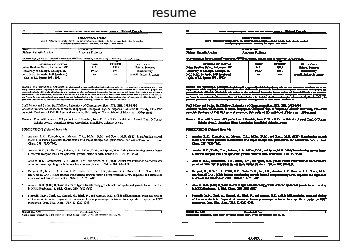

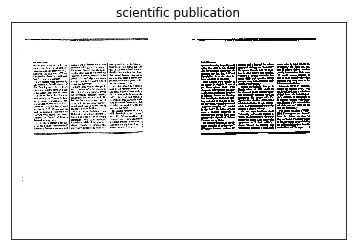

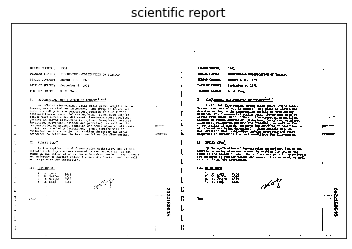

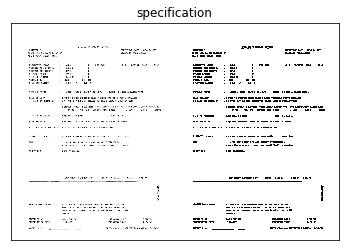

<IPython.core.display.Javascript object>

In [34]:
examples = random_photo_per_class(path_to_test_folder)[1:]
printPhotosFromEachClass(examples)

## Validation set

In [36]:
# converting .txt file to .csv file
txtfile = os.path.join(os.path.pardir, "labels", "val.txt")
csvfile = os.path.join(os.path.pardir, "csv_files", "validation.csv")

convertTxtToCsv(txtfile)

<IPython.core.display.Javascript object>

In [37]:
# Loading data
df = loadData(csvfile)
df.head()

,image,class
0,imagesg/g/t/h/gth35e00/2024525661.tif,11
1,imagesi/i/y/k/iyk38c00/512015827+-5827.tif,0
2,imagesr/r/r/e/rre21e00/87103403.tif,0
3,imagesk/k/s/u/ksu44c00/03636607.tif,4
4,imagesr/r/a/i/rai09d00/50437856-7857.tif,14


<IPython.core.display.Javascript object>

In [38]:
# take 100 images from each class for validating
df = sampleImages(df, 100)
changeDatatypes(df)
df

,image,class
0,imagesn/n/r/j/nrj68d00/503123700_503123701.tif,0
1,imagesl/l/j/j/ljj38c00/511460496+-0497.tif,0
2,imagesm/m/d/y/mdy34d00/506921195+-1195.tif,0
3,imagesg/g/o/g/gog71c00/2084114630.tif,0
4,imagesy/y/h/o/yho96c00/70057456-7456.tif,0
...,...,...
1595,imagesa/a/a/q/aaq21e00/87761107.tif,15
1596,imagesm/m/i/a/mia12d00/71171032.tif,15
1597,imagesx/x/x/y/xxy53c00/2062404159_4168.tif,15
1598,imagesy/y/u/g/yug92e00/2045496665.tif,15


<IPython.core.display.Javascript object>

In [40]:
# new directory where the 1600 images will be stored by category
os.chdir(path_to_validation_folder)
groupDocsByCtegory(df, path_to_validation_folder)

<IPython.core.display.Javascript object>

In [42]:
# rename each folder using the class name
renameFolders(df, path_to_validation_folder)

<IPython.core.display.Javascript object>

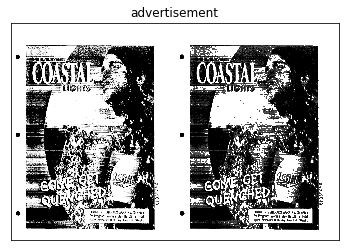

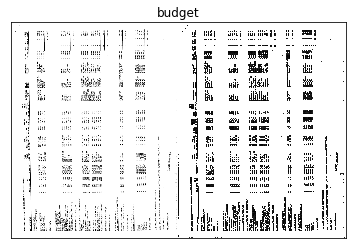

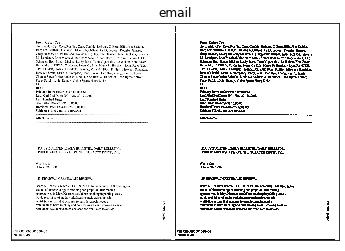

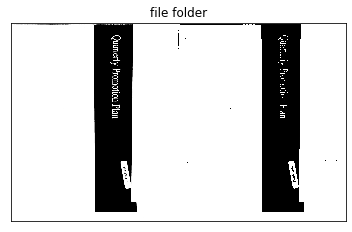

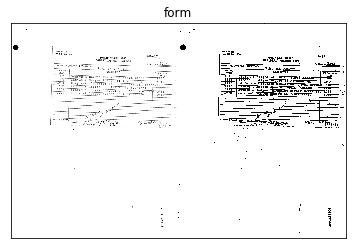

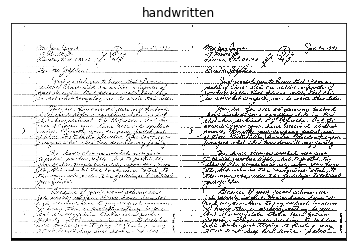

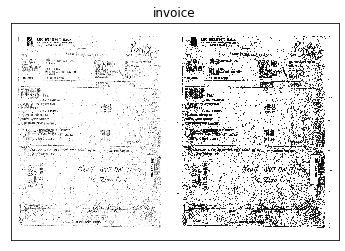

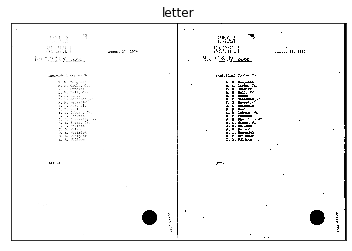

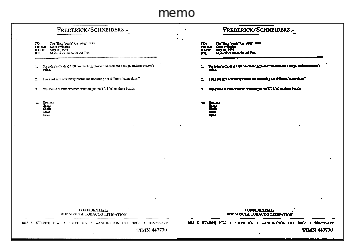

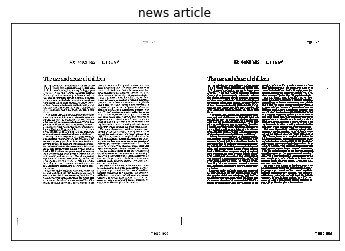

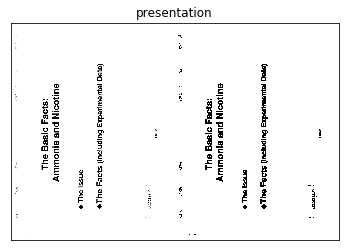

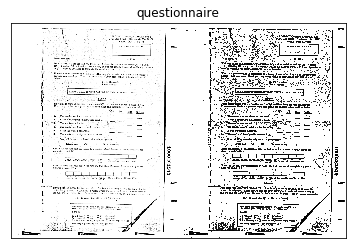

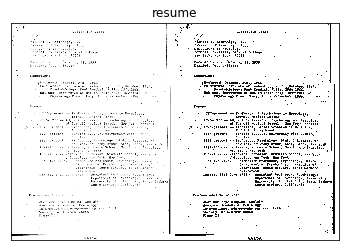

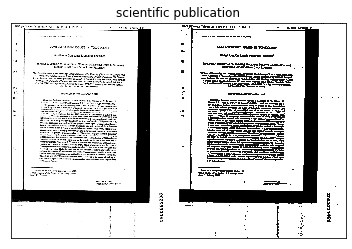

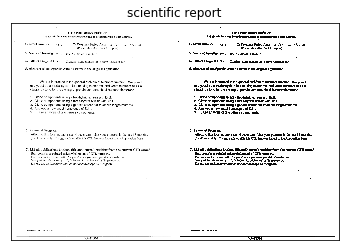

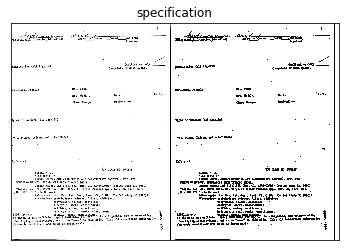

<IPython.core.display.Javascript object>

In [43]:
examples = random_photo_per_class(path_to_validation_folder)[1:]
printPhotosFromEachClass(examples)